<a href="https://colab.research.google.com/github/educhel/L03_Data_Analysis/blob/main/0113_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실전! 데이터 실습 (5)

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd

In [13]:
# 전처리가 필요한 특정 데이터프레임 불러오기
path = '/content/drive/MyDrive/새싹2기/데이터분석/data/preprocess_tips.csv'

tips = pd.read_csv(path,index_col=0)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
53,9.94,1.56,Male,False,Sun,Dinner Dinner,2
148,9.78,NaN,Male,False,Thur,Lunch Lunch,2
43,9.68,1.32,NaN,False,Sun,Dinner Dinner,2
178,9.60,4.00,FEMALE,Yes,Sun,Dinner Dinner,2
30,9.55,1.45,Male,False,Sat,Dinner Dinner,2


In [14]:
# 결측치 확인
tips.isnull().sum()

,0
total_bill,0
tip,24
sex,24
smoker,0
day,0
time,0
size,0


In [15]:
tips.dtypes

,0
total_bill,float64
tip,float64
sex,object
smoker,object
day,object
time,object
size,int64


## [1] 문자열 처리

### (1) 다음 중 어떤 작업을 먼저 수행하는 것이 더 안전한지 판단해 보세요.

- 문자열 정리가 선행되어야 한다.
- 문자열이 정리되어 있지 않으면, 이후 범주화 무의미(고정 카테고리)
- 사실은 같은 의미인데, 다르게 표현된 문자열들이 각자 다른 범주로 인식
    - Female, FEMALE, F
    - Male, MALE, M .. => 통일 먼저 시켜야 함

In [16]:
tips.select_dtypes(include='object')

,sex,smoker,day,time
53,Male,False,Sun,Dinner Dinner
148,Male,False,Thur,Lunch Lunch
43,NaN,False,Sun,Dinner Dinner
178,FEMALE,Yes,Sun,Dinner Dinner
30,Male,False,Sat,Dinner Dinner
...,...,...,...,...
51,FEMALE,False,Sun,Dinner Dinner
10,Male,False,Sun,Dinner Dinner
226,FEMALE,Yes,Fri,Lunch Lunch
82,FEMALE,False,Thur,Lunch Lunch


### (2) 데이터 타입을 확인하고, day 컬럼을 category 데이터 타입으로 변경해 보세요.

In [17]:
tips['day'].value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


In [9]:
# 문자열의 경우, 다음과 같은 일이 일어날 수도 있다.
# tips.loc[53,'day'] = '일요일' # 수정 가능
# tips.head()

,total_bill,tip,sex,smoker,day,time,size
53,9.94,1.56,Male,False,일요일,Dinner Dinner,2
148,9.78,NaN,Male,False,Thur,Lunch Lunch,2
43,9.68,1.32,NaN,False,Sun,Dinner Dinner,2
178,9.60,4.00,FEMALE,Yes,Sun,Dinner Dinner,2
30,9.55,1.45,Male,False,Sat,Dinner Dinner,2


In [10]:
# tips['day'].value_counts() # 표현 방식이 흐트러 질 수 있는 위험

,count
day,
Sat,87
Sun,75
Thur,62
Fri,19
일요일,1


In [18]:
tips['day'] = pd.Categorical(tips['day'],
                             categories=['Thur','Fri','Sat','Sun'],
                             )

In [19]:
print(tips['day'])

53      Sun
148    Thur
43      Sun
178     Sun
30      Sat
       ... 
51      Sun
10      Sun
226     Fri
82     Thur
235     Sat
Name: day, Length: 244, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']


### (3) 범주형 데이터를 확인해 보고, 이를 올바르게 처리해 보세요. (sex,smoker,time 컬럼 확인)
- step1: 문자열 정리
- step2: (필요시) 범주형 변환


In [20]:
# step1: 문자열 정리
tips['sex'].value_counts()

,count
sex,
Male,144
FEMALE,76


In [22]:
# str 액세서로 문자열 메소드 사용 가능
tips['sex'] = tips['sex'].str.lower()

In [24]:
# step2: (필요시) 범주형 변환
tips['sex'] = pd.Categorical(tips['sex'])

In [27]:
tips['smoker'].value_counts()

# 선택
# 1안 : True,False로 바꿀 것이냐?
# 2안 : Yes, No 로 바꿀 것이냐?

,count
smoker,
False,151
Yes,93


In [32]:
# 1안
# 문자열 -> Boolean
# map 함수로 값 변환

tips['smoker'] = tips['smoker'].map({'Yes':True, 'False':False})

In [31]:
# 2안 : Yes / No

# tips['smoker'].str.replace('False','No')

,smoker
53,No
148,No
43,No
178,Yes
30,No
...,...
51,No
10,No
226,Yes
82,No


In [29]:
# tips['smoker'].astype(bool) # 원하는 바를 얻지 못함

,smoker
53,True
148,True
43,True
178,True
30,True
...,...
51,True
10,True
226,True
82,True


In [33]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
53,9.94,1.56,male,False,Sun,Dinner Dinner,2
148,9.78,NaN,male,False,Thur,Lunch Lunch,2
43,9.68,1.32,NaN,False,Sun,Dinner Dinner,2
178,9.60,4.00,female,True,Sun,Dinner Dinner,2
30,9.55,1.45,male,False,Sat,Dinner Dinner,2


In [39]:
# 1. 구분자를 기준으로 분할한 데이터 프레임 제작
# 2. 그중 [0]이라는 이름을 가진 열만 선택한다.

tips['time'] = tips['time'].str.split(' ',expand=True)[0]

In [40]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
53,9.94,1.56,male,False,Sun,Dinner,2
148,9.78,NaN,male,False,Thur,Lunch,2
43,9.68,1.32,NaN,False,Sun,Dinner,2
178,9.60,4.00,female,True,Sun,Dinner,2
30,9.55,1.45,male,False,Sat,Dinner,2


### (4) 성별을 나타내는 컬럼의 이름을 gender로 변경하고, 시각화를 통해 남/녀의 비율을 확인해 보세요.


In [42]:
tips.rename(columns={'sex':'gender'},inplace=True)

In [44]:
vc_gender = tips['gender'].value_counts()
vc_gender

,count
gender,
male,144
female,76


<Axes: ylabel='count'>

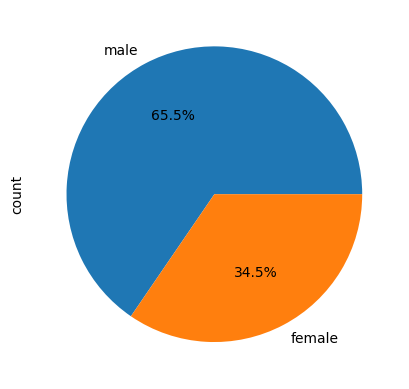

In [45]:
vc_gender.plot.pie(autopct='%1.1f%%')

## [2] 파생 컬럼

### (1) tip 컬럼을 기준으로  다음 기준의 tip_level 컬럼을 생성하세요.


In [53]:
# 선언 (define)
def leveling(tip):
    if pd.isnull(tip):
        return "Unknown"
    elif tip < 3:
        return "Low"
    elif tip < 6:
        return "Medium"
    else:
        return "High"

In [54]:
# 호출 (call)
leveling(1)

'Low'

In [55]:
tips['tip']

,tip
53,1.56
148,NaN
43,1.32
178,4.00
30,1.45
...,...
51,2.60
10,1.71
226,2.00
82,1.83


In [57]:
tips['tip_level'] = tips['tip'].map(leveling)

In [58]:
tips['tip_level'].value_counts()

,count
tip_level,
Low,109
Medium,103
Unknown,24
High,8


### (2)total_bill 대비 tip 비율을 계산하여 tip_ratio 컬럼을 생성해 보세요.

In [61]:
# 앞단에서 결측치 처리할 때 똑같이 해봤다!
tips['tips_ratio'] = tips['tip'] / tips['total_bill']

In [67]:
tips['tips_ratio'].mean()

np.float64(0.1596223370750199)

In [66]:
tips.loc[tips['tip'].isnull(),'tip'] = tips.loc[tips['tip'].isnull(),'total_bill'] * tips['tips_ratio'].mean()

## [3] 이상치 처리

### (1) 박스 플롯을 그려 이상치를 시각적으로 확인하세요.


<Axes: >

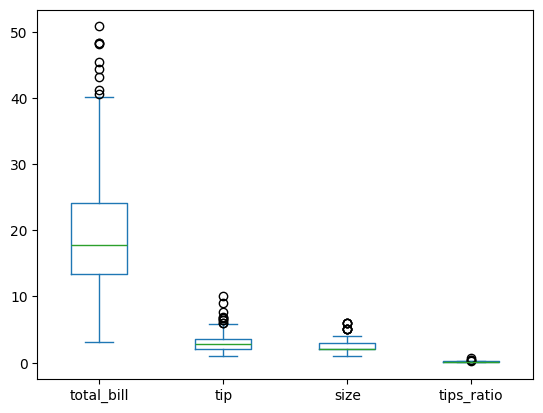

In [68]:
tips.plot.box()

### (2) 사분위 범위(IQR)를 기준으로 이상치를 처리하는 함수를 만들어 보세요.


In [73]:
# 선언 (define)
def get_outlier(df, column, weight):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + weight * IQR
    lower = Q1 - weight * IQR

    condition = (df[column] > upper) | (df[column] < lower)
    outlier_idx = df[condition].index
    return outlier_idx

### (2) 1.0 IQR을 기준으로 total_bill 컬럼의 이상치를 식별하고, 이에 해당하는 데이터는 삭제해 주세요.


In [75]:
ol_idx = get_outlier(tips, 'total_bill', 1.0)
ol_idx

Index([170, 212, 59, 156, 182, 102, 197, 142, 184, 95, 23, 207, 112, 56, 238,
       11],
      dtype='int64')

In [78]:
tips_clean = tips.drop(ol_idx)
tips_clean

,total_bill,tip,gender,smoker,day,time,size,tip_level,tips_ratio
53,9.94,1.560000,male,False,Sun,Dinner,2,Low,0.156942
148,9.78,1.561106,male,False,Thur,Lunch,2,Unknown,NaN
43,9.68,1.320000,NaN,False,Sun,Dinner,2,Low,0.136364
178,9.60,4.000000,female,True,Sun,Dinner,2,Medium,0.416667
30,9.55,1.450000,male,False,Sat,Dinner,2,Low,0.151832
...,...,...,...,...,...,...,...,...,...
51,10.29,2.600000,female,False,Sun,Dinner,2,Low,0.252672
10,10.27,1.710000,male,False,Sun,Dinner,2,Low,0.166504
226,10.09,2.000000,female,True,Fri,Lunch,2,Low,0.198216
82,10.07,1.830000,female,False,Thur,Lunch,1,Low,0.181728


In [77]:
tips.shape

(244, 9)

In [81]:
tips.describe()['total_bill']

,total_bill
count,244.000000
mean,19.785943
std,8.902412
min,3.070000
25%,13.347500
50%,17.795000
75%,24.127500
max,50.810000


<Axes: ylabel='Frequency'>

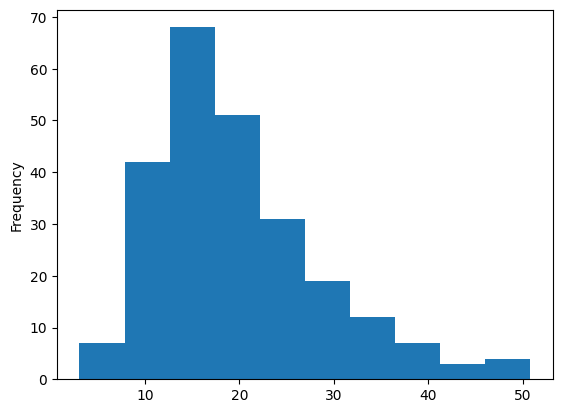

In [83]:
tips['total_bill'].plot.hist()

In [82]:
tips_clean.describe()['total_bill']

,total_bill
count,228.000000
mean,18.211404
std,6.732146
min,3.070000
25%,13.105000
50%,17.165000
75%,22.535000
max,34.830000


<Axes: ylabel='Frequency'>

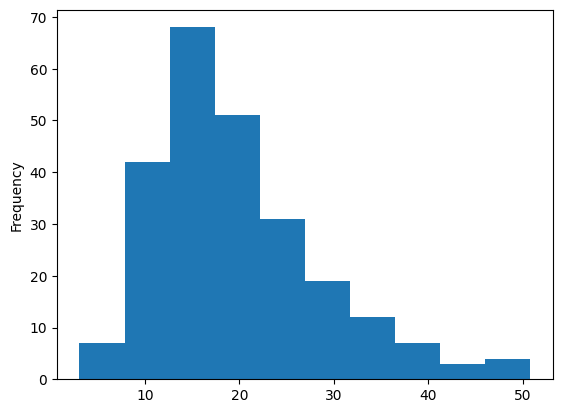

In [84]:
tips['total_bill'].plot.hist()